<a href="https://colab.research.google.com/github/finaali/Project/blob/main/Diabetes_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas

In [3]:
!pip install numpy

In [4]:
!pip install seaborn

In [6]:
!pip install matplotlib

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import Data

In [10]:
df = pd.read_csv('Diabetes.csv', index_col=0)
df

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1. Data Understanding

In [11]:
print("Data Shape : ", df.shape)

Data Shape :  (768, 9)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [14]:
df[['Kehamilan', 'Tekanan Darah', 'Umur', 'BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [15]:
df.Hasil.value_counts()

0    500
1    268
Name: Hasil, dtype: int64

## 2. Cleaning Data

In [18]:
df.isnull().sum()

Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

In [19]:
df.duplicated().sum()

0

## 3. Exploratory Data Analysis (EDA)

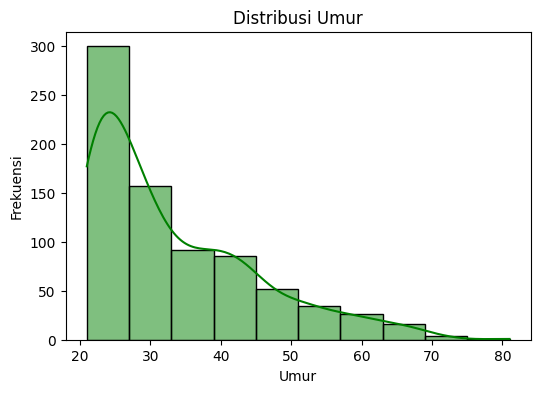

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Umur', bins=10, kde=True, color='green')

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()